In [7]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [8]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

Data shape: (45211, 9)


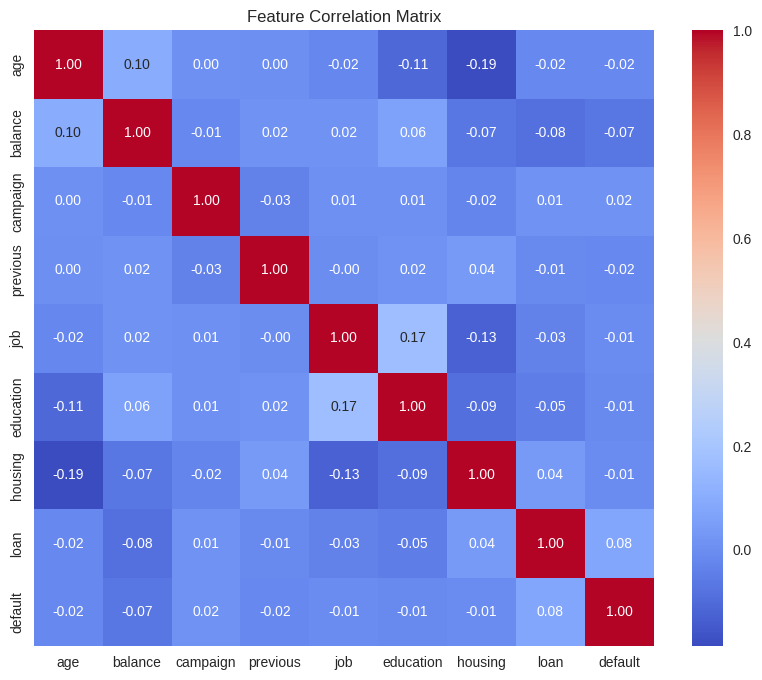

In [9]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features]

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled =scaler.fit_transform(X)

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)

plt.figure(figsize=(10, 8))
sns.heatmap(
    pd.DataFrame(X_scaled, columns=[
        'age','balance','campaign','previous','job','education','housing','loan','default'
    ]).corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f"
)
plt.title("Feature Correlation Matrix")
plt.show()

In [10]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[idx]

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                new_centroids.append(self.centroids[i])
            else:
                new_centroids.append(cluster_points.mean(axis=0))
        return np.array(new_centroids)

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)

            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break

            self.centroids = new_centroids

        self.labels = labels
        return self
    def predict(self, X):
        if self.centroids is None:
            raise ValueError("Model not fitted yet.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

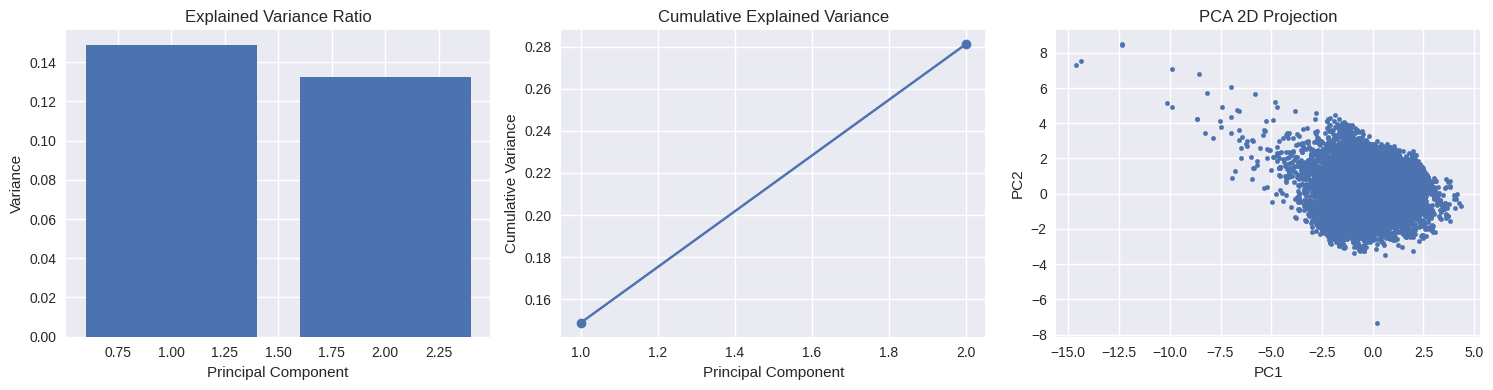

Shape after PCA: (45211, 2)


In [11]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(15, 4))

    # Plot explained variance
    plt.subplot(1,3,1)
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_)
    plt.title("Explained Variance Ratio")
    plt.xlabel("Principal Component")
    plt.ylabel("Variance")

    # Plot cumulative explained variance
    plt.subplot(1, 3, 2)
    cumulative_var = pca.explained_variance_ratio_.cumsum()
    plt.plot(range(1, n_components+1), cumulative_var, marker='o')
    plt.title("Cumulative Explained Variance")
    plt.xlabel("Principal Component")
    plt.ylabel("Cumulative Variance")

    # Plot data in 2D
    plt.subplot(1,3,3)
    plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
    plt.title("PCA 2D Projection")
    plt.xlabel("PC1")
    plt.ylabel("PC2")

    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

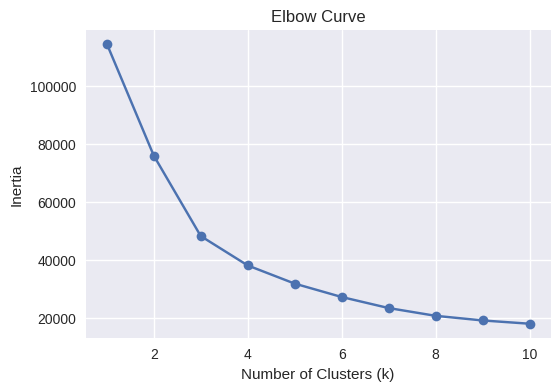

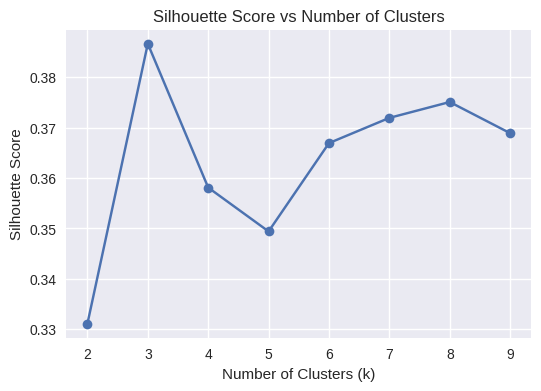

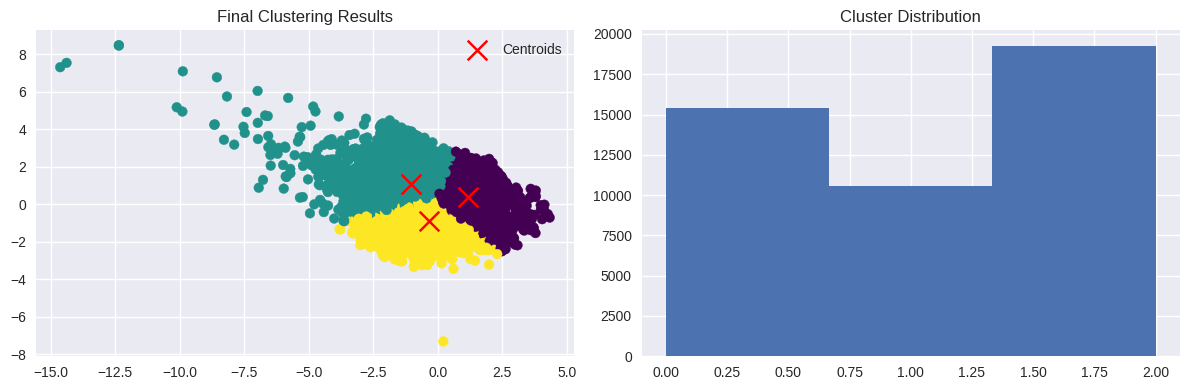

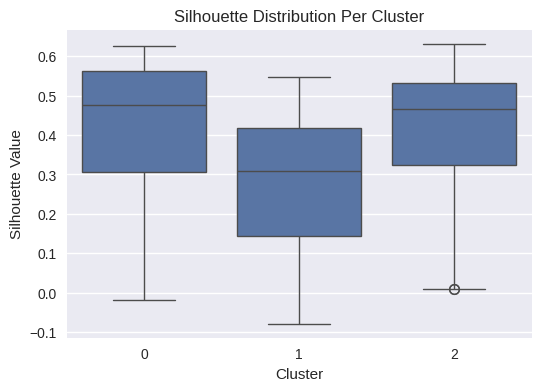


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [12]:
from sklearn.metrics import silhouette_samples

def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroids[i])**2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    K = range(1, max_k + 1)
    for k in K:
        kmeans = KMeansClustering(n_clusters=k)
        kmeans.fit(X)
        inertias.append(calculate_inertia(X, kmeans.labels, kmeans.centroids))

    plt.figure(figsize=(6,4))
    plt.plot(K, inertias, marker='o')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Curve")
    plt.show()

    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

sil_scores = []
K = range(2, 10)

for k in K:
    km = KMeansClustering(n_clusters=k)
    km.fit(X_pca)
    sil_scores.append(silhouette_score(X_pca, km.labels))

plt.figure(figsize=(6,4))
plt.plot(K, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()


# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

# Plot evaluation metrics
plt.subplot(1, 2, 2)
plt.hist(kmeans.labels, bins=3)
plt.title("Cluster Distribution")

plt.tight_layout()
plt.show()

sil_vals = silhouette_samples(X_pca, kmeans.labels)
df_sil = pd.DataFrame({"cluster": kmeans.labels, "silhouette": sil_vals})

plt.figure(figsize=(6,4))
sns.boxplot(data=df_sil, x="cluster", y="silhouette")
plt.title("Silhouette Distribution Per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Silhouette Value")
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [17]:
from sklearn.cluster import KMeans
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        n = len(X)
        labels = np.zeros(n, dtype=int)
        current_clusters = 1
        next_label = 1

        while current_clusters < self.n_clusters:
            largest_cluster = max(set(labels), key=lambda c: np.sum(labels == c))
            mask = labels == largest_cluster
            X_sub = X[mask]

            # KMeans split
            km = KMeans(n_clusters=2, random_state=self.random_state).fit(X_sub)
            left = km.labels_ == 0
            right = km.labels_ == 1

            mask_idx = np.where(mask)[0]
            labels[mask_idx[left]] = largest_cluster
            labels[mask_idx[right]] = next_label

            # Store info
            self.centers_[largest_cluster] = km.cluster_centers_[0]
            self.centers_[next_label] = km.cluster_centers_[1]
            self.split_tree[largest_cluster] = (largest_cluster, next_label)

            next_label += 1
            current_clusters += 1

        self.labels_ = labels
        return labels

# Example (for instructor use only):
# bisect = BisectingKMeans(n_clusters=4)
# labels = bisect.fit_predict(X_pca)
# plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)


In [18]:

bisect = BisectingKMeans(n_clusters=3, random_state=42)
bisect_labels = bisect.fit_predict(X_pca)
unique, counts = np.unique(bisect_labels, return_counts=True)
bisect_cluster_sizes = dict(zip(unique, counts))

print("Bisecting K-means Cluster Sizes:")
for cluster, size in bisect_cluster_sizes.items():
    print(f"Cluster {cluster}: {size} samples")

# 2. SILHOUETTE SCORE
from sklearn.metrics import silhouette_score
bisect_silhouette = silhouette_score(X_pca, bisect_labels)

print("\nBisecting K-means Silhouette Score:", round(bisect_silhouette, 4))

Bisecting K-means Cluster Sizes:
Cluster 0: 11350 samples
Cluster 1: 20156 samples
Cluster 2: 13705 samples

Bisecting K-means Silhouette Score: 0.2915


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!